In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = 'house_price_regression_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Display Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
# Describe function
data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [6]:
# Check for null values 
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [7]:
# Skewness
data.skew(numeric_only=True)

Square_Footage         -0.066001
Num_Bedrooms            0.025884
Num_Bathrooms           0.049917
Year_Built             -0.021254
Lot_Size               -0.044288
Garage_Size            -0.040400
Neighborhood_Quality   -0.020445
House_Price            -0.063955
dtype: float64

In [8]:
# Kurtosis
data.kurtosis(numeric_only=True)

Square_Footage         -1.128061
Num_Bedrooms           -1.333604
Num_Bathrooms          -1.512391
Year_Built             -1.185454
Lot_Size               -1.200895
Garage_Size            -1.493259
Neighborhood_Quality   -1.205551
House_Price            -1.091382
dtype: float64

In [9]:
# Mean and standard Deviation 
print("Mean:", np.mean(data["Num_Bedrooms"]))
print("Standard Deviation", np.std(data["Num_Bedrooms"]))

Mean: 2.99
Standard Deviation 1.4268496767354295


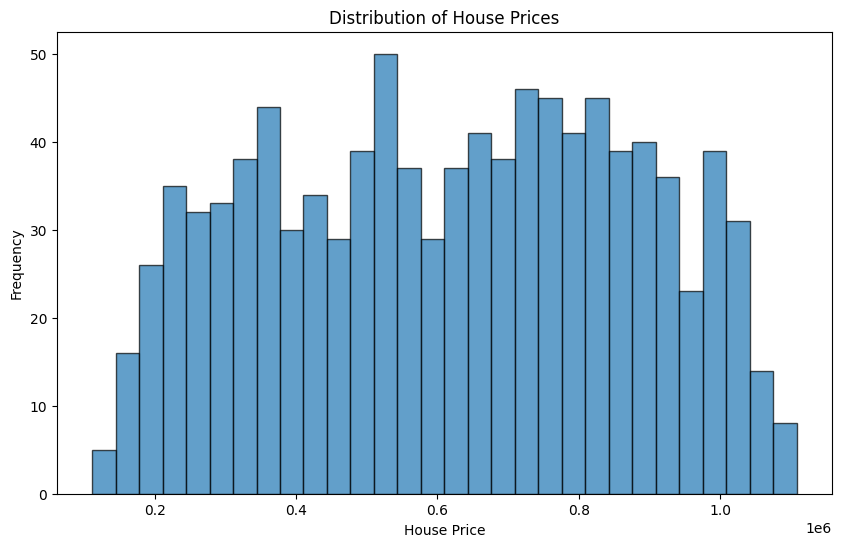

In [4]:
def hist_plot(data):
    plt.figure(figsize=(10, 6))
    plt.hist(data['House_Price'], bins=30, alpha=0.7, edgecolor='black')
    plt.title('Distribution of House Prices')
    plt.xlabel('House Price')
    plt.ylabel('Frequency')
    plt.show()

hist_plot(data)

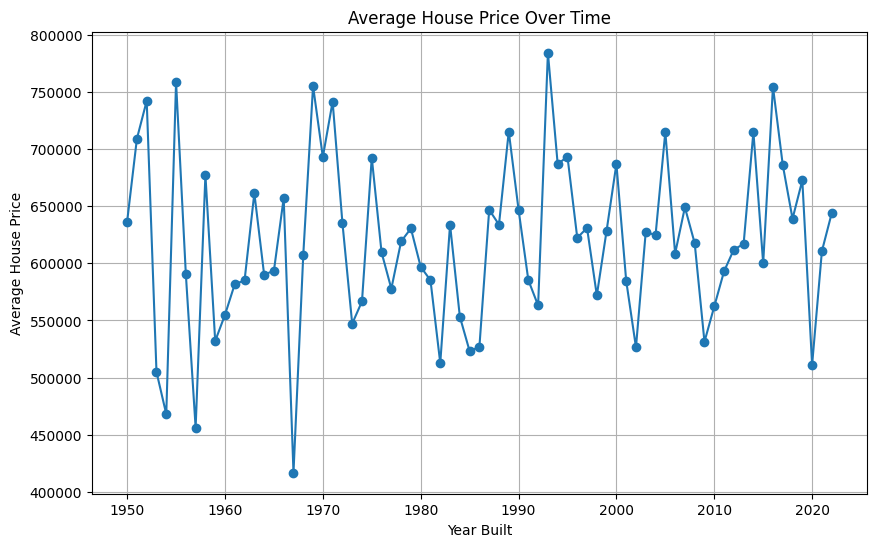

In [7]:
def line_plot(data):
    average_price_by_year = data.groupby('Year_Built')['House_Price'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o')
    plt.title('Average House Price Over Time')
    plt.xlabel('Year Built')
    plt.ylabel('Average House Price')
    plt.grid(True)
    plt.show()

line_plot(data)

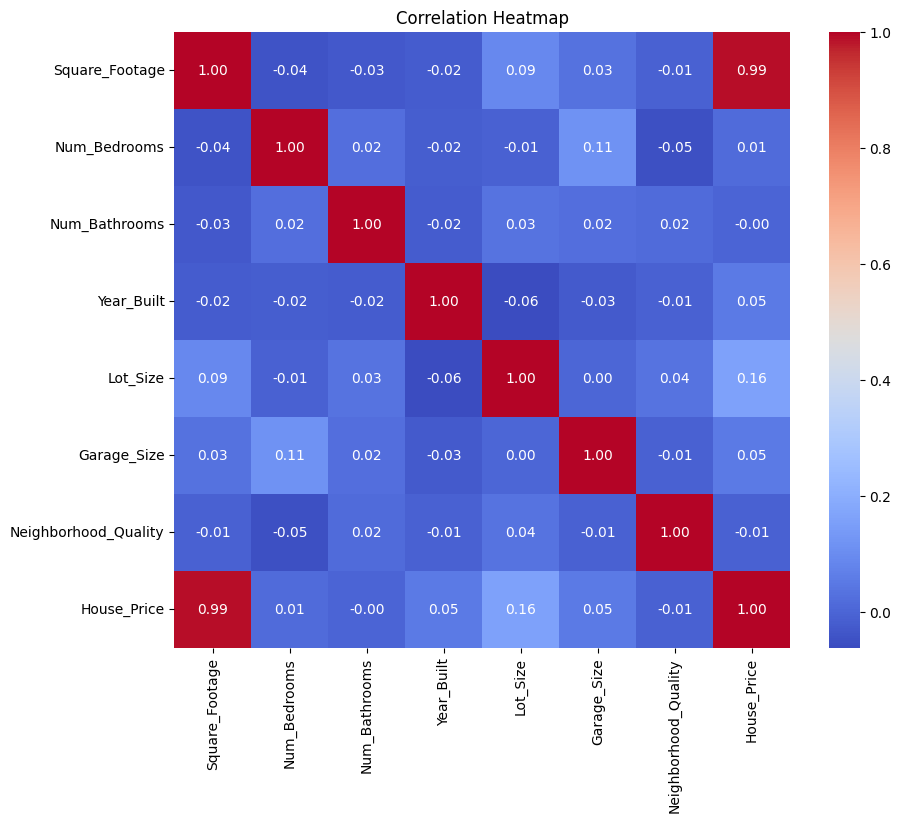

In [10]:
def corr_plot(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

corr_plot(data)

In [18]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Preprocessing: Standardize numeric columns for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])

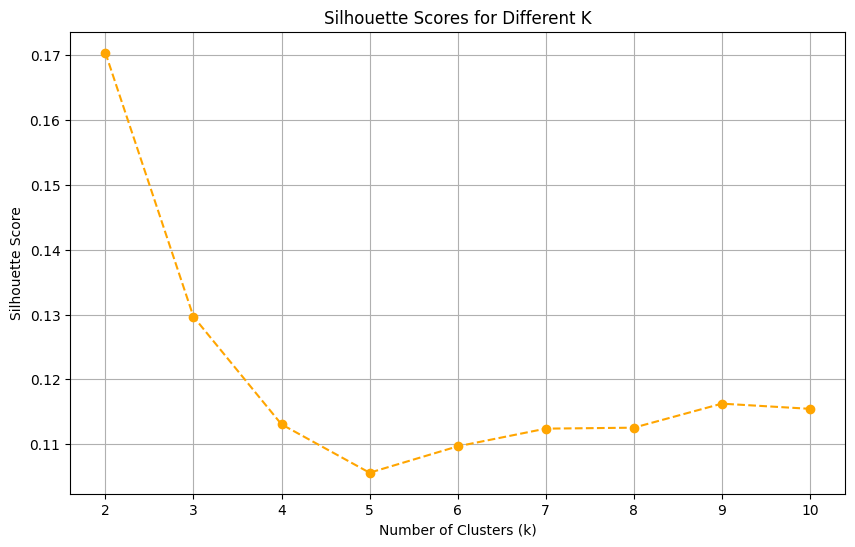

In [19]:
def silhouette_plot(data):
    # Determine optimal number of clusters using the silhouette score
    silhouette_scores = []
    k_values = range(2, 11)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))


    # Silhouette Plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='orange')
    plt.title('Silhouette Scores for Different K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    # Optimal number of clusters
    return silhouette_scores.index(max(silhouette_scores)) + 2

optimal_k = silhouette_plot(data)

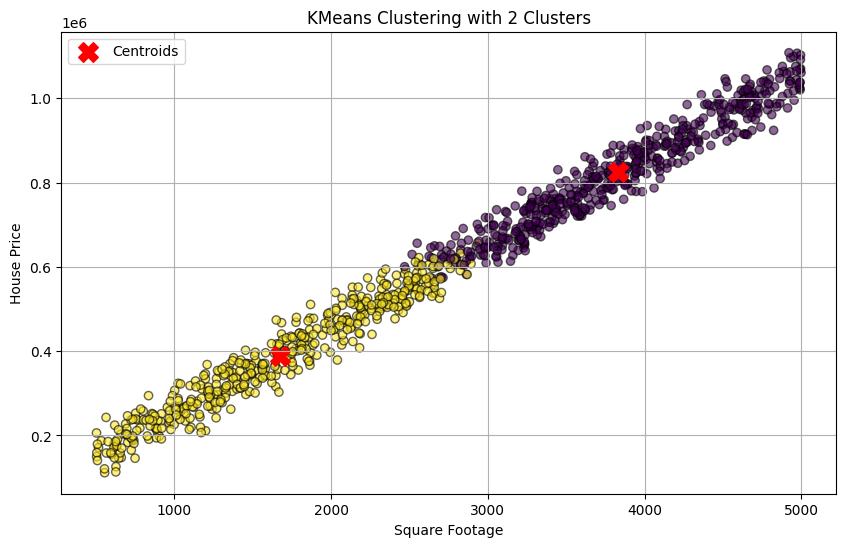

In [21]:
def kmeans_clustering(data):    
    # Perform KMeans clustering with the optimal number of clusters
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans_optimal.fit_predict(scaled_data)
    cluster_centers = scaler.inverse_transform(kmeans_optimal.cluster_centers_)

    # Scatter plot with clusters and centers
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Square_Footage'], data['House_Price'], c=data['Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, -1], s=200, c='red', marker='X', label='Centroids')
    plt.title(f'KMeans Clustering with {optimal_k} Clusters')
    plt.xlabel('Square Footage')
    plt.ylabel('House Price')
    plt.legend()
    plt.grid(True)
    plt.show()

kmeans_clustering(data)

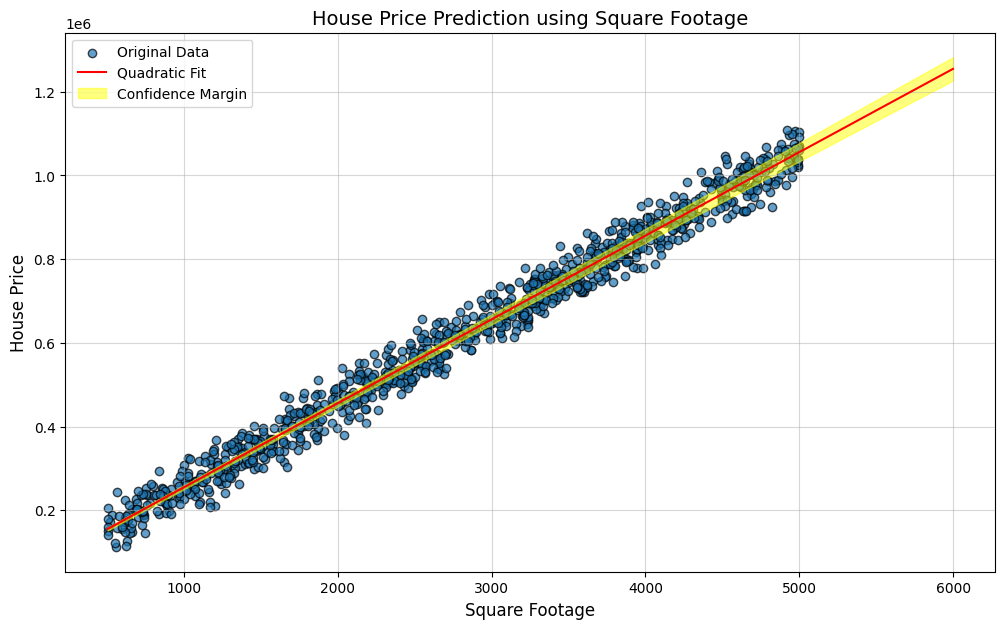

In [23]:
def curve_fitting(data):
    x_data_square_footage = data['Square_Footage']
    y_data_price = data['House_Price']

    # Define the quadratic function
    def quadratic(x, a, b, c):
        return a * x**2 + b * x + c

    # Fit the quadratic model
    params, covariance = curve_fit(quadratic, x_data_square_footage, y_data_price)

    # Calculate standard errors for confidence intervals
    perr_sqft = np.sqrt(np.diag(covariance))

    # Extend predictions to cover a wider range of `Square_Footage`
    future_x = np.linspace(min(x_data_square_footage), max(x_data_square_footage) + 1000, 300)
    future_y = quadratic(future_x, *params)

    # Scale confidence intervals for reduced margin
    scale_factor = 0.5
    upper_confidence = quadratic(
        future_x, *(params + perr_sqft * scale_factor)
    )
    lower_confidence = quadratic(
        future_x, *(params - perr_sqft * scale_factor)
    )

    # Plot the extended prediction with confidence intervals
    plt.figure(figsize=(12, 7))
    plt.scatter(x_data_square_footage, y_data_price, alpha=0.7, label='Original Data', edgecolors='k')
    plt.plot(future_x, future_y, 'r-', label='Quadratic Fit')
    plt.fill_between(
        future_x, lower_confidence, upper_confidence,
        color='yellow', alpha=0.5, label='Confidence Margin'
    )
    plt.title('House Price Prediction using Square Footage', fontsize=14)
    plt.xlabel('Square Footage', fontsize=12)
    plt.ylabel('House Price', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

curve_fitting(data)